
# Gradient Descent Intuition — Intercept (b) Movement with Visual History

This notebook **fixes the earlier limitations** and gives a *much clearer visual intuition*.

What we do here:

1. Use a **larger, noisy housing-style dataset**
2. Fit **OLS (closed-form)** → shown as **RED line**
3. Keep slope **fixed**
4. Start with a **very wrong intercept**
5. Apply **Gradient Descent on intercept only**
6. Visualize:
   - History of lines moving closer to OLS
   - ❌ **Cross markers showing intercept positions**


## 1. Imports

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



## 2. Create a Larger, Noisy Housing Dataset

Underlying relationship:
\[
price = 50000 \times size + 200000
\]

Noise ensures the data is **not perfectly linear**.


In [5]:

np.random.seed(42)

n_samples = 50
X = np.random.uniform(400, 1500, n_samples).reshape(-1, 1)

noise = np.random.normal(0, 40000, n_samples)
y = 50000 * X.flatten() + 200000 + noise


## 3. Fit OLS (Closed-form Solution)

In [7]:

ols = LinearRegression()
ols.fit(X, y)

m_true = ols.coef_[0]
b_true = ols.intercept_

print("OLS slope (m):", m_true)
print("OLS intercept (b):", b_true)


OLS slope (m): 49991.87512741286
OLS intercept (b): 207117.5200136006


## 4. Visualize Data and OLS Line

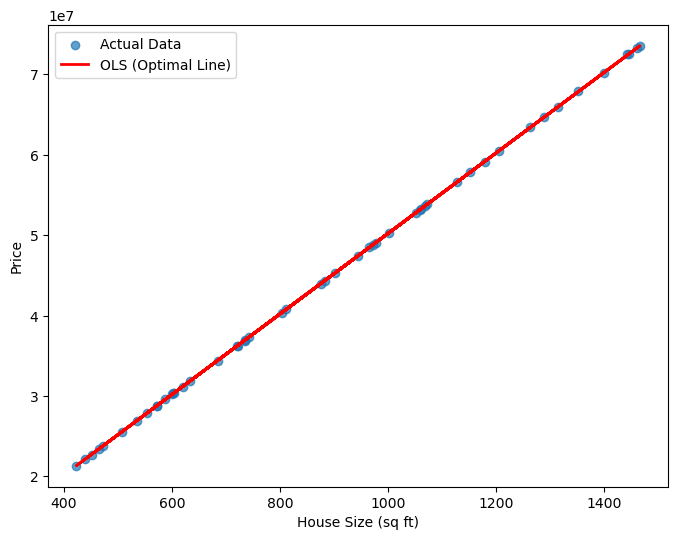

In [9]:

plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.7, label="Actual Data")
plt.plot(X, m_true * X + b_true, color="red", linewidth=2, label="OLS (Optimal Line)")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price")
plt.legend()
plt.show()



## 5. Initialize Gradient Descent (Very Bad Intercept)

- Slope **fixed**
- Intercept **very far** from optimal


In [11]:

b = -1_500_000     # intentionally very wrong
learning_rate = 5e-8
epochs = 40



## 6. Gradient Descent Loop (Updating Only b)

Gradient:
\[
\frac{\partial J}{\partial b} = -\frac{2}{n} \sum (y - (mx + b))
\]


In [13]:

b_history = []

for epoch in range(epochs):
    y_pred = m_true * X.flatten() + b
    db = (-2 / len(X)) * np.sum(y - y_pred)
    b = b - learning_rate * db
    b_history.append(b)



## 7. Visualizing Gradient Descent Movement

- Gray lines → intermediate GD steps
- ❌ Crosses → intercept positions
- Red line → OLS solution


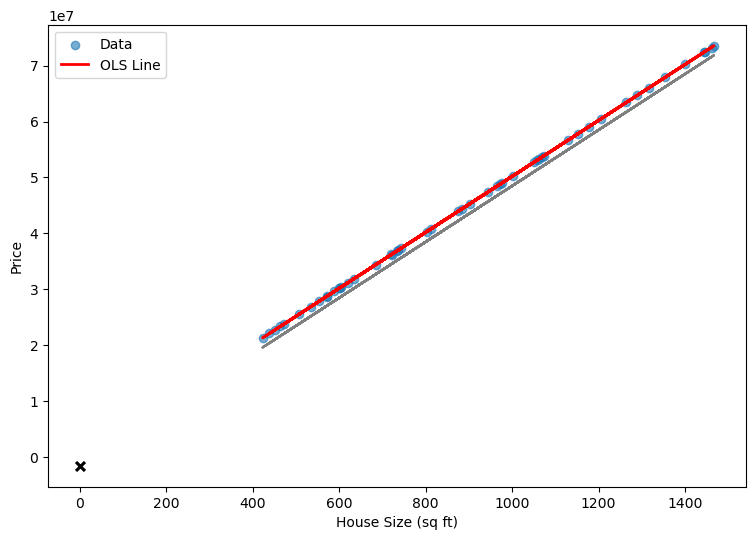

In [15]:

plt.figure(figsize=(9,6))

# Scatter data
plt.scatter(X, y, alpha=0.6, label="Data")

# Plot GD history lines
for i, b_val in enumerate(b_history):
    if i % 4 == 0:
        plt.plot(X, m_true * X + b_val, color="gray", alpha=0.35)
        plt.scatter(0, b_val, marker='x', color='black')  # intercept cross

# True line
plt.plot(X, m_true * X + b_true, color="red", linewidth=2, label="OLS Line")

plt.xlabel("House Size (sq ft)")
plt.ylabel("Price")
plt.legend()
plt.show()



## 8. What You Should Notice

✔ Early lines are **far away**  
✔ Each update moves **only vertically**  
✔ Crosses show how **b is changing**  
✔ Lines slowly converge to the OLS line  

This is Gradient Descent **in its simplest, purest form**.
